In [1]:
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

df=pd.read_csv("C://Users//yoona//Desktop//drug.csv")
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


C:\Users\yoona\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Drug', ylabel='count'>

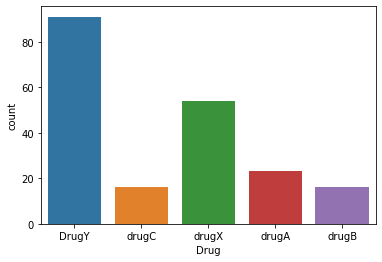

In [10]:
import seaborn as sns
sns.countplot(df['Drug'])

In [3]:
# 값을 엑셀에서 바꾸지 않고 파이썬에서 바꿔줌

df = df.replace('F',0)
df = df.replace('M',1)

df = df.replace('LOW',0)
df = df.replace('NORMAL',1)
df = df.replace('HIGH',2)

df = df.replace('drugA',0)
df = df.replace('drugB',1)           # change drug name to drug number
df = df.replace('drugC',2)
df = df.replace('drugX',3)
df = df.replace('DrugY',4)

df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,2,2,25.355,4
1,47,1,0,2,13.093,2
2,47,1,0,2,10.114,2
3,28,0,1,2,7.798,3
4,61,0,0,2,18.043,4
...,...,...,...,...,...,...
195,56,0,0,2,11.567,2
196,16,1,0,2,12.006,2
197,52,1,1,2,9.894,3
198,23,1,1,1,14.020,3


In [4]:
df.info()            # data type이 object에서 int로 바뀐것을 확인할 수 있다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    int64  
 2   BP           200 non-null    int64  
 3   Cholesterol  200 non-null    int64  
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 9.5 KB


In [17]:
X = df.loc[:,:'Na_to_K']   # before 'Drug'

y = df.loc[:,'Drug']
y

0      4
1      2
2      2
3      3
4      4
      ..
195    2
196    2
197    3
198    3
199    3
Name: Drug, Length: 200, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X                            #feature 
                                                    , y                          #target
                                                    , stratify = df.iloc[:,-1] 
                                                    , random_state = 1)          

print(y_train,'\n')
print(y_test)

192    4
195    2
198    3
135    3
126    4
      ..
165    4
22     4
53     4
45     3
132    3
Name: Drug, Length: 150, dtype: int64 

20     4
51     3
54     1
152    3
173    4
3      3
143    4
121    4
185    4
151    1
12     4
181    3
76     0
40     4
101    0
159    3
157    4
190    4
13     4
67     3
118    0
74     4
1      2
158    2
58     3
172    4
43     3
168    4
42     4
27     3
16     3
180    4
142    1
93     4
23     4
100    0
107    4
103    3
91     4
102    2
6      4
106    3
183    4
164    4
2      2
64     1
137    0
62     4
199    3
187    0
Name: Drug, dtype: int64


In [19]:
model = RandomForestClassifier(n_estimators=180)   # 트리의 개수 기본은 10개
model.fit(X_train,y_train)     # 학습
prediction = model.predict(X_test)
# print(prediction == y_test)            # 예측 결과와 실제 y_test 정답을 비교

print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

1.0
1.0


Accuracy is:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00        13
           4       1.00      1.00      1.00        23

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



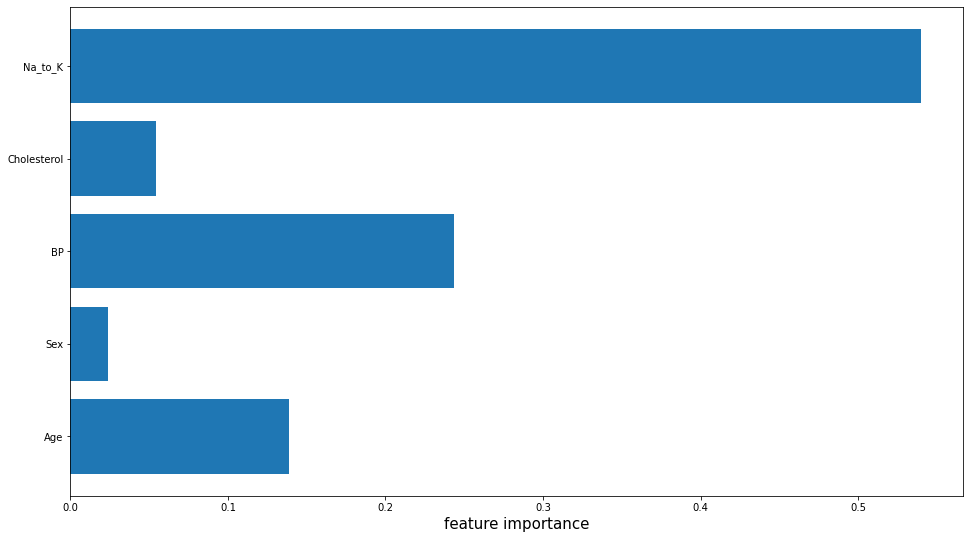

In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score            # 그냥 정확도... score랑 동일
from sklearn.metrics import classification_report

print("Accuracy is: ", accuracy_score(prediction, y_test))
print(classification_report(prediction, y_test))                      # support는 실제 정답에 해당 클래스가 몇개인지 수 : 1 class가 압도적으로 많다

feature_names = ['Age','Sex','BP','Cholesterol','Na_to_K']
n_feature = 5    # 피쳐 갯수
idx = np.arange(n_feature)

plt.figure(figsize=(16, 9))
plt.barh(idx, model.feature_importances_, align='center')
plt.yticks(idx, feature_names)
plt.xlabel('feature importance', size=15)
plt.show()

In [21]:
print(model.feature_importances_)

# feature importance가 선형적으로 더해지는게 아니라 각 feature의 중요도는 유지하되, 정확한 중요도 % 값은 달라진다.

# 분류 정확도도 98% ---> 100%로 향상됨

[0.1388845  0.02365739 0.2436729  0.05399438 0.53979083]


Confusion matrix, without normalization
[[ 6  0  0  0  0]
 [ 0  4  0  0  0]
 [ 0  0  4  0  0]
 [ 0  0  0 13  0]
 [ 0  0  0  0 23]]
Normalized confusion matrix
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


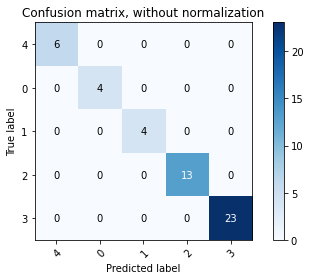

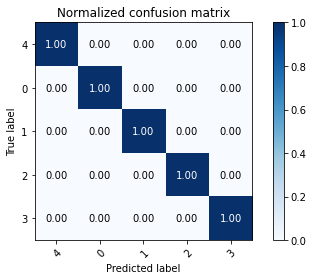

In [23]:
class_names = np.array(['0','1','2','3','4'], dtype='<U10')       # 최종 분류 모델이 1또는 2또는 3임
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
# Confusion Matrix 시각화
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    cm = confusion_matrix(y_true, y_pred)
    classes = classes[unique_labels(y_true, y_pred)-1]        # 원래는 없던 건데 -1 해준다
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# 정규화 안한 confusion matrix
plot_confusion_matrix(y_test, prediction, classes=class_names, title='Confusion matrix, without normalization')

# 정규화 한 confusion matrix
plot_confusion_matrix(y_test, prediction, classes=class_names, normalize=True, title='Normalized confusion matrix')
plt.show()